Average bikes for month 1: 2176.3387096774195
Average bikes for month 2: 2655.2982456140353
Average bikes for month 3: 3692.2580645161293
Average bikes for month 4: 4484.9
Average bikes for month 5: 5349.774193548387
Average bikes for month 6: 5772.366666666667
Average bikes for month 7: 5563.677419354839
Average bikes for month 8: 5664.419354838709
Average bikes for month 9: 5766.516666666666
Average bikes for month 10: 5199.225806451613
Average bikes for month 11: 4247.183333333333
Average bikes for month 12: 3403.8064516129034




Average bikes for season 1: 2604.1325966850827
Average bikes for season 2: 4992.33152173913
Average bikes for season 3: 5644.303191489362
Average bikes for season 4: 4728.162921348315




Avarege registered users: 3656.172366621067
Avarege casual users: 848.1764705882352
Average bikes for year 0: 3405.7616438356163
Average bikes for year 1: 5599.934426229508




Average bikes for weekday 0: 4228.828571428571
Average bikes for weekday 1: 4338.1238095238095


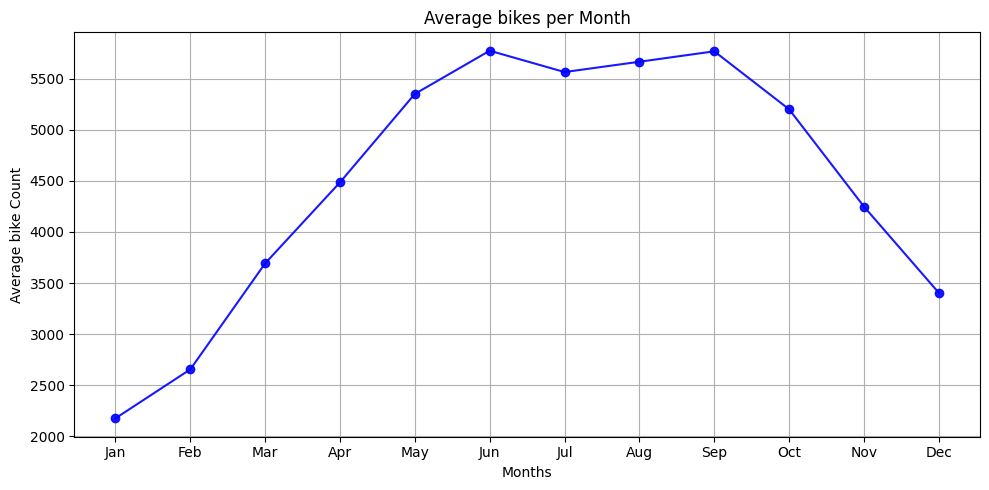

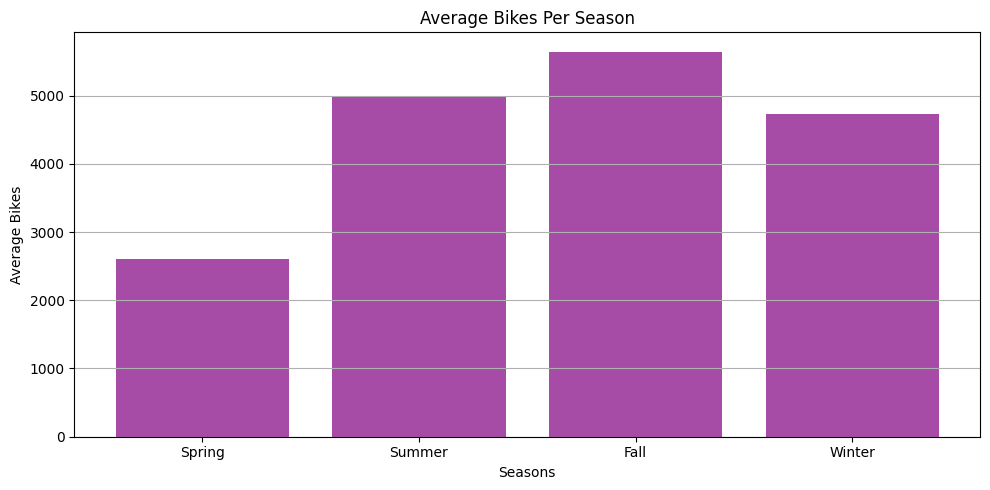

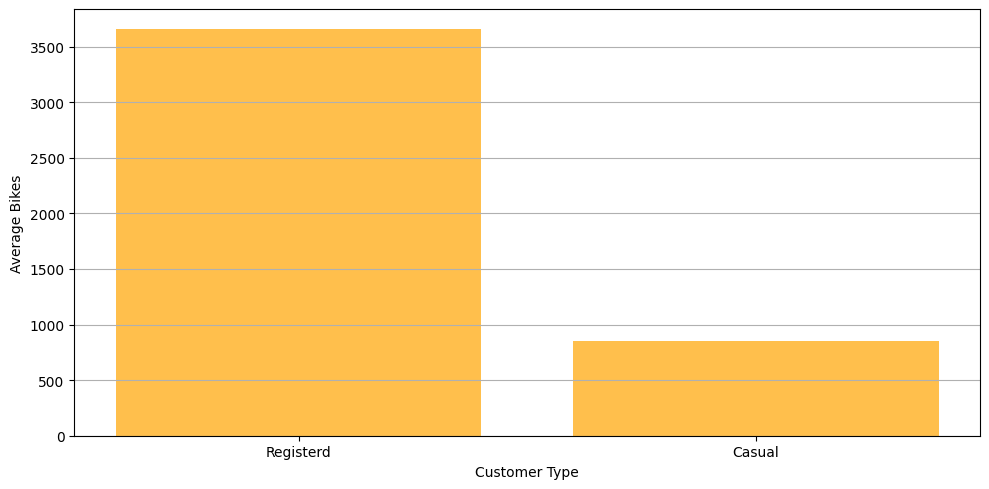

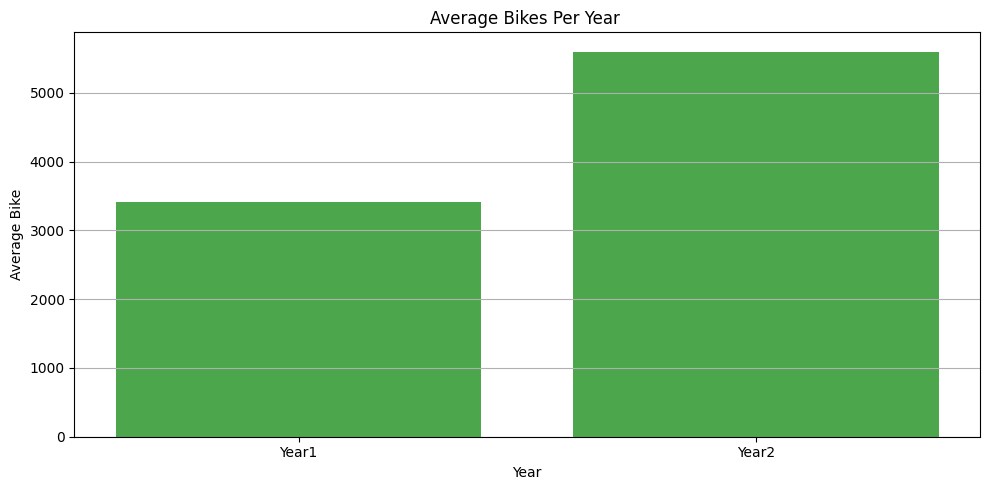

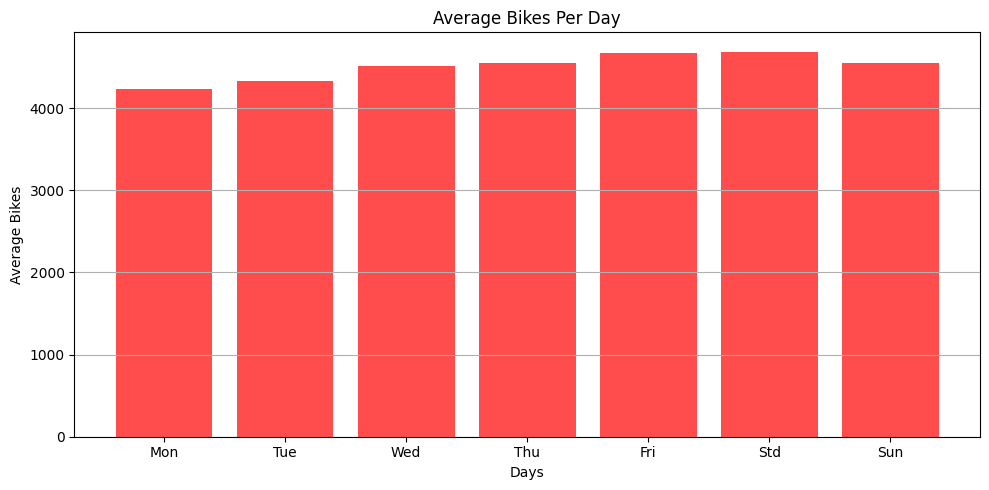

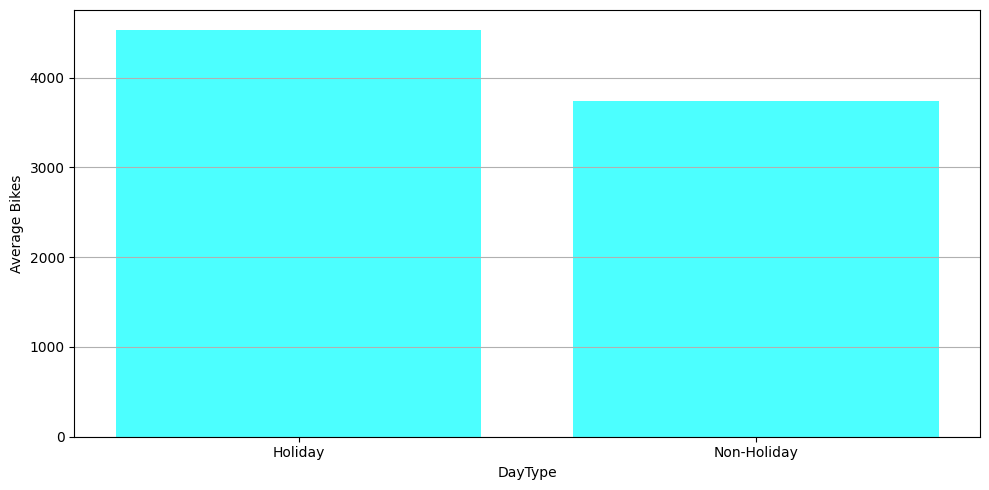

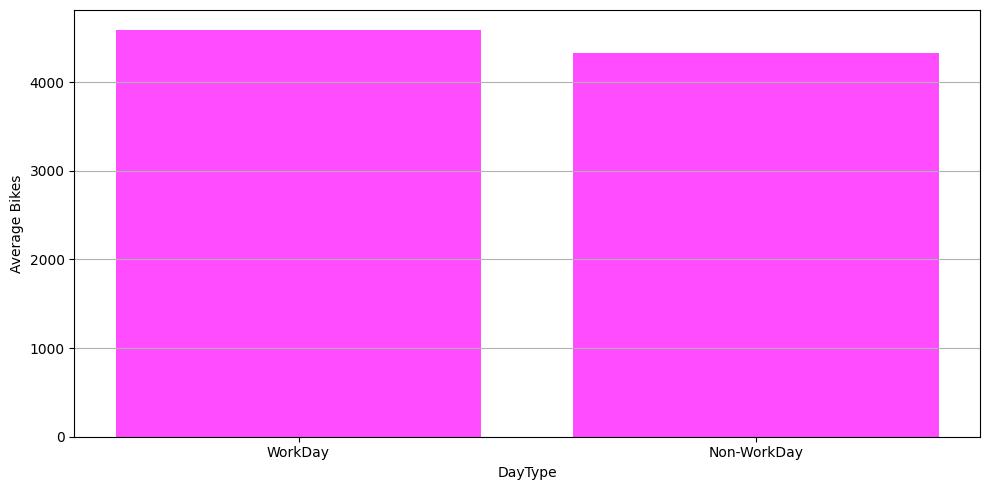

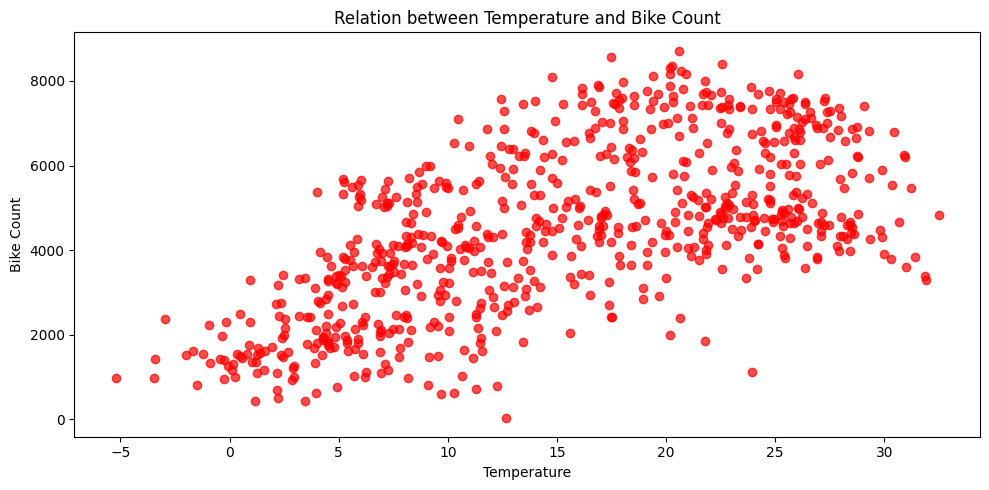

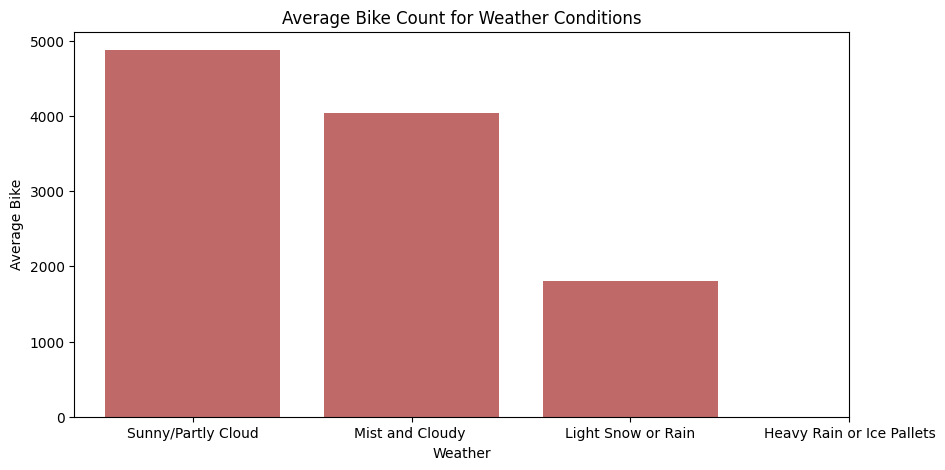

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Step 1: Load the data

df= pd.read_csv("data/day.csv")

#Figure of Monthly Bikes
month_labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_avg =df.groupby("mnth" ,sort=True)["cnt"].mean()
monthly_avg = monthly_avg.sort_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg.index,monthly_avg.values,  color="blue",alpha=0.9,marker='o')
plt.title("Average bikes per Month")
plt.xlabel("Months")
plt.ylabel("Average bike Count")
plt.xticks(range(1,13),month_labels)
plt.grid(True)
plt.tight_layout()


for i in range(1, 13):
    print(f"Average bikes for month {i}: {df[df['mnth'] == i]['cnt'].mean()}")
print("\n\n\n")





# Getting Average bikes for each season
season_labels=[
    "Spring","Summer","Fall","Winter"
]
seasonly_avg=df.groupby("season" ,sort=True)["cnt"].mean()

seasonly_avg= seasonly_avg.sort_index()

plt.figure(figsize=(10,5))
plt.bar(seasonly_avg.index,seasonly_avg.values,color="purple",alpha=0.7)
plt.title("Average Bikes Per Season")
plt.xlabel("Seasons")
plt.ylabel("Average Bikes")
plt.grid(axis="y")
plt.xticks(range(1,5),season_labels)
plt.tight_layout()

for i in range(1, 5):
    print(f"Average bikes for season {i}: {df[df['season'] == i]['cnt'].mean()}")


print("\n\n\n")


#Compare between registered and casual users
print(f'Avarege registered users: {df["registered"].mean()}')
print(f'Avarege casual users: {df["casual"].mean()}')
plt.figure(figsize=(10,5))
plt.bar(["Registerd","Casual"],[df["registered"].mean() ,df["casual"].mean()],color="orange",alpha=0.7)
plt.xlabel("Customer Type")
plt.ylabel("Average Bikes")
plt.grid(axis="y")
plt.tight_layout()



# Getting Average bikes for each year
yearly_avg=df.groupby("yr", sort=True)["cnt"].mean()
yearly_avg = yearly_avg.sort_index()

plt.figure(figsize=(10,5))
plt.bar(yearly_avg.index,yearly_avg.values,color="green",alpha=0.7)
plt.title("Average Bikes Per Year ")
plt.xlabel("Year")
plt.ylabel("Average Bike")
plt.grid(axis="y")
plt.xticks(range(0,2),["Year1","Year2"])
plt.tight_layout()

for i in range(0, 2):
    print(f"Average bikes for year {i}: {df[df['yr'] == i]['cnt'].mean()}")
    
print("\n\n\n")
#Avarage Bikes per Days
day_labels=[
    "Mon","Tue","Wed","Thu","Fri","Std","Sun"
]
daily_avg=df.groupby("weekday",sort=True)["cnt"].mean()
daily_avg =daily_avg.sort_index()
plt.figure(figsize=(10,5))
plt.bar(daily_avg.index,daily_avg.values,color="red",alpha=0.7)
plt.title("Average Bikes Per Day")
plt.xlabel("Days")
plt.ylabel("Average Bikes")
plt.grid(axis="y")
plt.tight_layout()
plt.xticks(range(0,7),day_labels)

for i in range(0,7):
    print(f'Average bikes for weekday {i}: {df[df["weekday"] == i]["cnt"].mean()}')
print("\n\n\n")


#Comperision of Holidays and Non-Holidays
for i in range(0,2):
    if i ==0:
        print(f'Average bike count for Non-Holiday is:{df[df["holiday"]==0]["cnt"].mean()}')
    elif i ==1:
        print(f'Average bike count for Holiday is:{df[df["holiday"]==1]["cnt"].mean()}')
print("\n\n\n")
plt.figure(figsize=(10,5))
plt.bar(["Holiday","Non-Holiday"],{df[df["holiday"]==1]["cnt"].mean() ,df[df["holiday"]==0]["cnt"].mean()},color="cyan",alpha=0.7)
plt.xlabel("DayType")
plt.ylabel("Average Bikes")
plt.grid(axis="y")
plt.tight_layout()

#Comperision of Workdays and Non-Workdays
for i in range(0,2):
    if i ==0:
        print(f'Average bike count for Non-Workday is:{df[df["workingday"]==0]["cnt"].mean()}')
    elif i ==1:
        print(f'Average bike count for Workday is:{df[df["workingday"]==1]["cnt"].mean()}')
print("\n\n\n")
plt.figure(figsize=(10,5))
plt.bar(["WorkDay","Non-WorkDay"],{df[df["workingday"]==1]["cnt"].mean() ,df[df["workingday"]==0]["cnt"].mean()},color="magenta",alpha=0.7)
plt.xlabel("DayType")
plt.ylabel("Average Bikes")
plt.grid(axis="y")
plt.tight_layout()

#Relation between Temperature ad bike count
plt.figure(figsize=(10,5))
#temp is normilezed with equation (t+8/47) Celcius
plt.scatter((df["temp"]*47)-8,df["cnt"],color="red",alpha=0.7)
plt.xlabel("Temperature")
plt.ylabel("Bike Count")
plt.title("Relation between Temperature and Bike Count")
plt.tight_layout()

#Bike count based on wheather coondition
#1 = sunny/partly cloud | 2 =mist + cloudy | 3 = light snow/rain | 4 = heavy rain/ ıce pallets
weathrly_avg = df.groupby("weathersit", sort=True)["cnt"].mean()
weather_labels =["Sunny/Partly Cloud" ,"Mist and Cloudy ", "Light Snow or Rain" , "Heavy Rain or Ice Pallets"]
weathrly_avg = weathrly_avg.sort_index()
plt.figure(figsize=(10,5))
plt.bar(weathrly_avg.index,weathrly_avg.values,color="brown",alpha=0.7)
plt.xlabel("Weather")
plt.ylabel("Average Bike")
plt.title("Average Bike Count for Weather Conditions")
plt.xticks(range(1,5),weather_labels)



plt.show()
